In [69]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("https://storage.googleapis.com/public-quant/course//content/insurance.csv")

# Perform an EDA

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['sex'] = df['sex'].map({'female':1, 'male':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

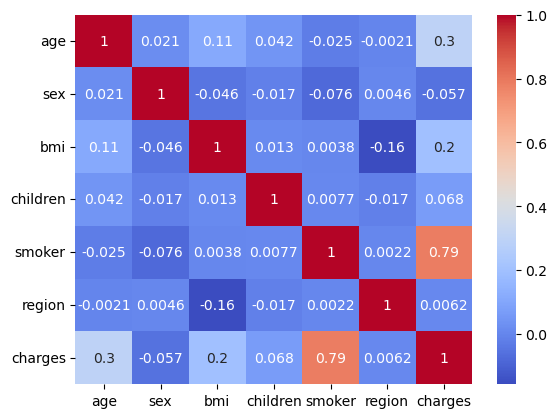

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

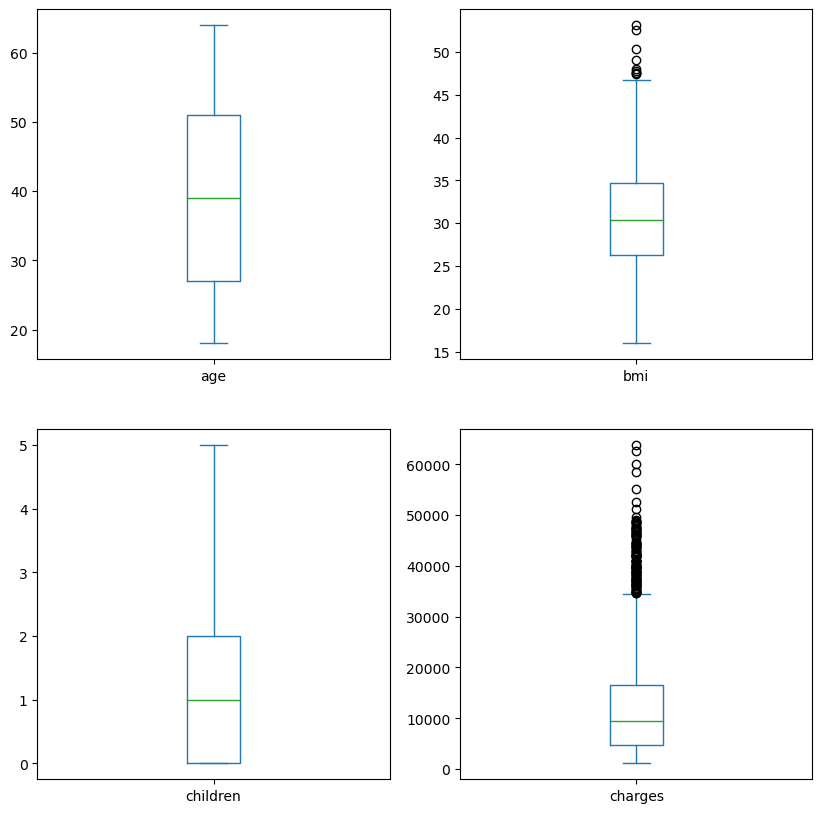

In [10]:
columns = ['age', 'bmi', 'children', 'charges']
df[columns].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False, sharey=False)
plt.show()

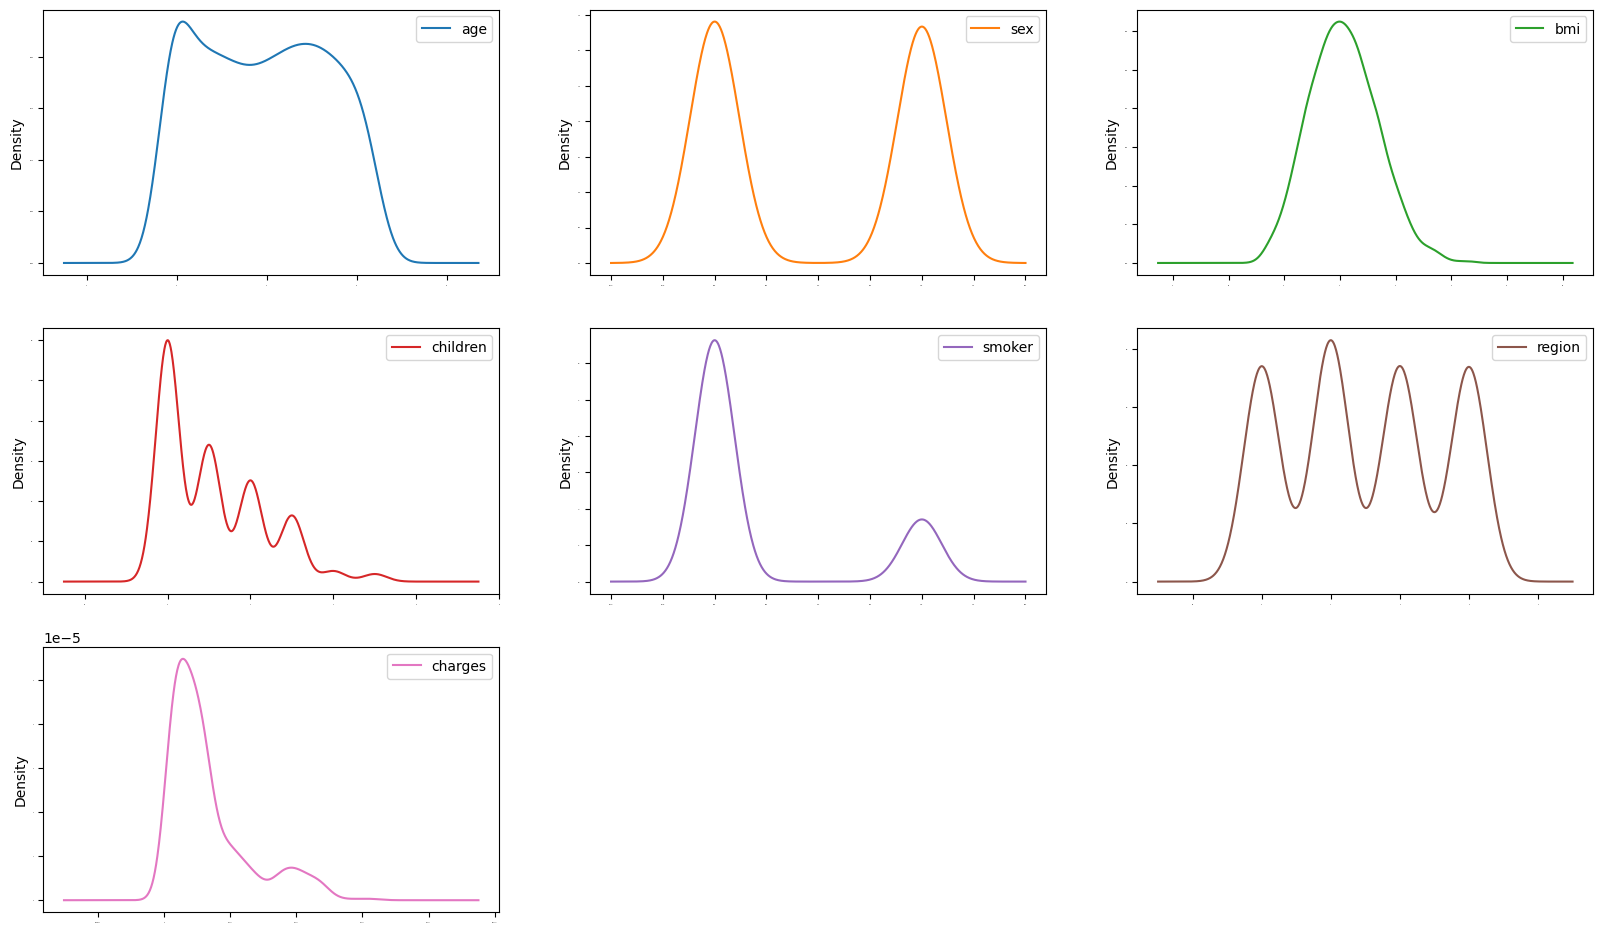

In [11]:
# Density
df.plot(kind='density', subplots=True, layout=(5,3), fontsize=1, figsize=(20,20), sharex=False)
plt.show()

# Build models

In [50]:
# Preparing the data
df = df.drop_duplicates()
df['charges'] = np.log1p(df['charges'])

x = df.drop('charges', axis=1)
y = df['charges']

#1=train 2=test
x_1, x_2, y_1, y_2 = train_test_split(x, y, test_size=0.2, random_state=3)

scaler = StandardScaler()
x_1 = scaler.fit_transform(x_1)
x_2 = scaler.transform(x_2)

In [51]:
# Lasso Regression
# Define a pipeline that includes polynomial features and lasso regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('lasso', Lasso())])

# Define a range of hyperparameters for tuning
params = {'poly_features__degree': [1, 2, 3], 
          'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_lasso_model = grid_search.best_estimator_


lasso_predict = best_lasso_model.predict(x_2)
lasso_rmse = mean_squared_error(y_2, lasso_predict, squared=False)

print("RMSE of Lasso Regression: ", lasso_rmse)

RMSE of Lasso Regression:  0.005613192220389873


In [52]:
# Ridge Regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('ridge', Ridge())])

params = {'poly_features__degree': [1, 2, 3], 
          'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_ridge_model = grid_search.best_estimator_


ridge_predict = best_ridge_model.predict(x_2)
ridge_rmse = mean_squared_error(y_2, ridge_predict, squared=False)

print("RMSE of Ridge Regression: ", ridge_rmse)

RMSE of Ridge Regression:  0.004888183221882984


In [53]:
# Elastic Net Regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('elastic', ElasticNet())])

params = {'poly_features__degree': [1, 2, 3], 
          'elastic__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_elastic_model = grid_search.best_estimator_


elastic_predict = best_elastic_model.predict(x_2)
elastic_rmse = mean_squared_error(y_2, elastic_predict, squared = False)

print("RMSE of Elastic Net Regression: ", elastic_rmse)

RMSE of Elastic Net Regression:  0.0050600917459439655


In [54]:
# Decision Tree Regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('dt', DecisionTreeRegressor())])

params = {'poly_features__degree': [1, 2, 3], 
          'dt__max_depth': [3, 5, 7, 9],  
          'dt__min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_dt_model = grid_search.best_estimator_

dt_predict = best_dt_model.predict(x_2)
dt_rmse = mean_squared_error(y_2, dt_predict, squared=False)

print("RMSE of Decision Tree Regression:", dt_rmse)

RMSE of Decision Tree Regression: 0.005192076031584922


In [55]:
# K Neighbors Regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('kn', KNeighborsRegressor())])

params = {'poly_features__degree': [1, 2, 3], 
          'kn__n_neighbors': [3, 5, 7, 10],
          'kn__weights': ['uniform', 'distance']}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_kn_model = grid_search.best_estimator_

kn_predict = best_kn_model.predict(x_2)
kn_rmse = mean_squared_error(y_2, kn_predict, squared=False)

print("KNeighborsRegressor RMSE: ", kn_rmse)

KNeighborsRegressor RMSE:  0.0050293333623937725


In [56]:
# Linear Regression
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                     ('linear', LinearRegression())])

params = {'poly_features__degree': [1, 2, 3]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_1, y_1)
best_linear_model = grid_search.best_estimator_

linear_predict = best_linear_model.predict(x_2)
linear_rmse = mean_squared_error(y_2, linear_predict, squared=False)

print("RMSE of Linear Regression: ", linear_rmse)

RMSE of Linear Regression:  0.0048812649004592685


# Analyze the results

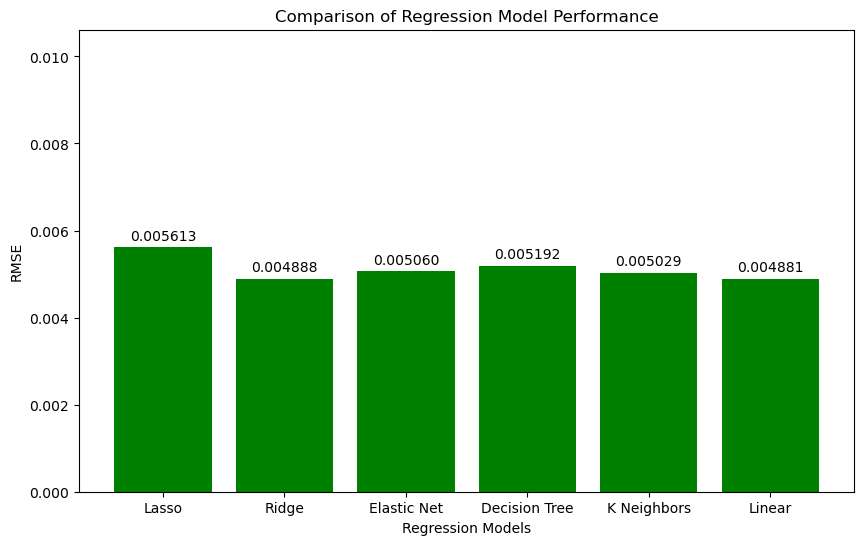

In [57]:
# Compare the RMSE I got from each model
rmse = {
    'Lasso': lasso_rmse,
    'Ridge': ridge_rmse,
    'Elastic Net': elastic_rmse,
    'Decision Tree': dt_rmse,
    'K Neighbors': kn_rmse,
    'Linear': linear_rmse}

models = list(rmse.keys())
rmse_values = list(rmse.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='green')
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of Regression Model Performance')
plt.ylim(0, max(rmse_values) + 0.005) 

for i in range(len(models)):
    plt.text(i, rmse_values[i] + 0.0001, f'{rmse_values[i]:.6f}', ha='center', va='bottom')

plt.show()

In [58]:
# K-folds cross validation
models = {
    'linear': LinearRegression(),
    'kn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(),
    'elastic': ElasticNet(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

kfold = KFold(n_splits=10, shuffle=True, random_state=3)
results = []
names = []

# Evaluate each model
for name, model in models.items():
    cv_scores = cross_val_score(model, x_1, y_1, cv=kfold, scoring='neg_mean_squared_error')

    model.fit(x_1, y_1)  

    results.append(-cv_scores)  
    names.append(name)

    print(f"{name}: CV Mean MSE: {-cv_scores.mean():.6f}")

linear: CV Mean MSE: 0.000040
kn: CV Mean MSE: 0.000035
dt: CV Mean MSE: 0.000051
elastic: CV Mean MSE: 0.000163
Ridge: CV Mean MSE: 0.000040
Lasso: CV Mean MSE: 0.000163


From the graph and data above, we know that Elastic Net Regression is the model with the smallest RMSE and CV mean MSE. So I will do further analysis on it.

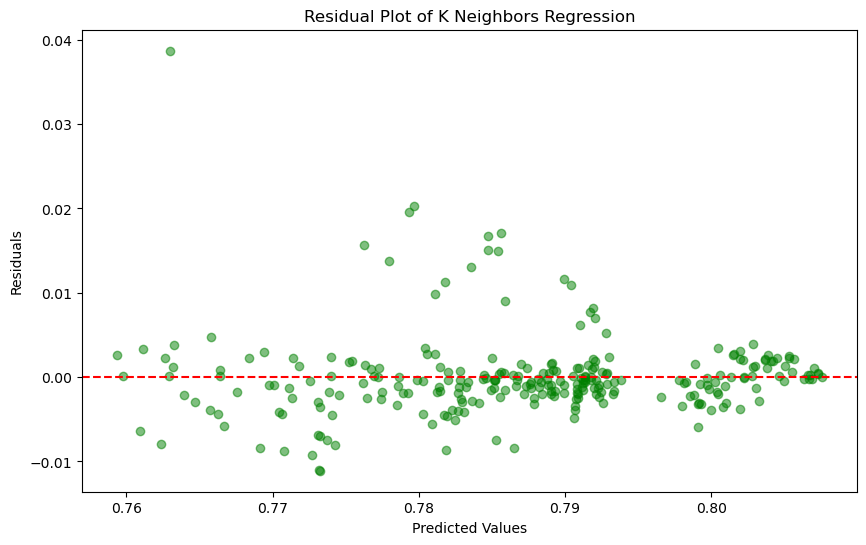

In [61]:
# Residual Analysis
residuals = y_2 - kn_predict

plt.figure(figsize=(10, 6))
plt.scatter(kn_predict, residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of K Neighbors Regression')

plt.show()

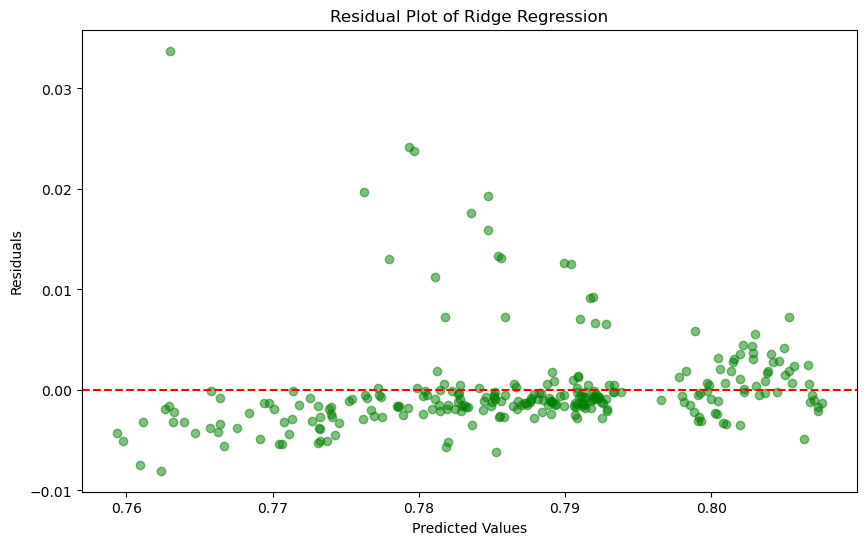

In [60]:
residuals = y_2 - ridge_predict

plt.figure(figsize=(10, 6))
plt.scatter(kn_predict, residuals, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Ridge Regression')

plt.show()

In [76]:
# Feature Importance Analysis
names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  

results = permutation_importance(best_kn_model, x_2, y_2, scoring='neg_mean_squared_error')

# Extract the mean importance of each feature
importances = results.importances_mean

poly_features = best_kn_model.named_steps['poly_features']
feature_names = poly_features.get_feature_names_out(input_features=names)

feature_importances_df = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances_df.reset_index(inplace=True)
feature_importances_df.rename(columns={'index': 'Feature'}, inplace=True)

print(feature_importances_df)

    Feature  Importance
0       age    0.000110
1       sex    0.000001
2       bmi    0.000006
3  children    0.000018
4    smoker    0.000169
5    region    0.000004


In [67]:
# Find the number of neighbors of the best kn model
print("Best KNeighborsRegressor Estimator: ", best_kn_model)

Best KNeighborsRegressor Estimator:  Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('kn', KNeighborsRegressor(n_neighbors=10))])


In [66]:
print("Best KNeighborsRegressor Estimator: ", best_ridge_model)

Best KNeighborsRegressor Estimator:  Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=10))])


In [70]:
# Find the R^2 score
print(r2_score(y_2, kn_predict))

0.8435895413985548


In [71]:
print(r2_score(y_2, ridge_predict))

0.8522457794889086


# Summary

In the "Comparison of Regression Model Performance" bar chart, which depicts the root mean square error (RMSE) for each model, Ridge Regression yields the lowest error values. In the CV Mean MSE findings, Ridge Regression yields the lowest error values. Since they both got closer results in those two test. So, I picked them together to do further analysis. 

The residual plot is done first, it's a diagnostic tool to detect non-linearity, heteroscedasticity, and outliers. Both graph appears that the residuals – the differences between the observed values and the values predicted by the model – are relatively scattered around the zero line. It's good as it suggests there's no obvious pattern to the errors made by the model and indicates that the model has captured most of the explanatory information in the data. What's more, the residuals randomly dispersed around the horizontal axis and don't seem to form any discernible pattern around the zero line, which is a sign of a well-fitted model.

Then I did a feature importance test for K Neighbors Regression. It shows each input feature's importance in the performance of a predictive model. The higher, the better. In K Neighbors Regression model, the 'smoker' feature stands out as having the highest coefficient, indicating it is the most influential variable in predicting the target. Feature 'age' can be a good preditor as well since its value just a bit smaller than 'smoker'.

After calling the best K Neighbors and Ridge Regression model I got from grid search, I got the corresponding number of neighbors and alpha. Than I use this number to calculate the R^2 scores, the proportion of the variation in the dependent variable that is predictable from the independent variable. The value for K Neighbors Regression is approximately 0.843. This indicates a strong correlation, showing that about 84.3% of the variability in the response variable can be explained by the model, which is a relatively high score and suggests a good fit to the training data. And it's same for Ridge Regression mode which get 85.2%.

However, despite K Neighbors and Ridge Regression stands out, it's important to note that the six models' performance is relatively close to each other, suggesting that they all have merit depending on the use case and data specifics.